In [1]:
#from IPython.display import Image
from PIL import Image, ImageEnhance

In [2]:
img1=Image.open('image1.jpeg')
img2=Image.open('image2.jpeg')

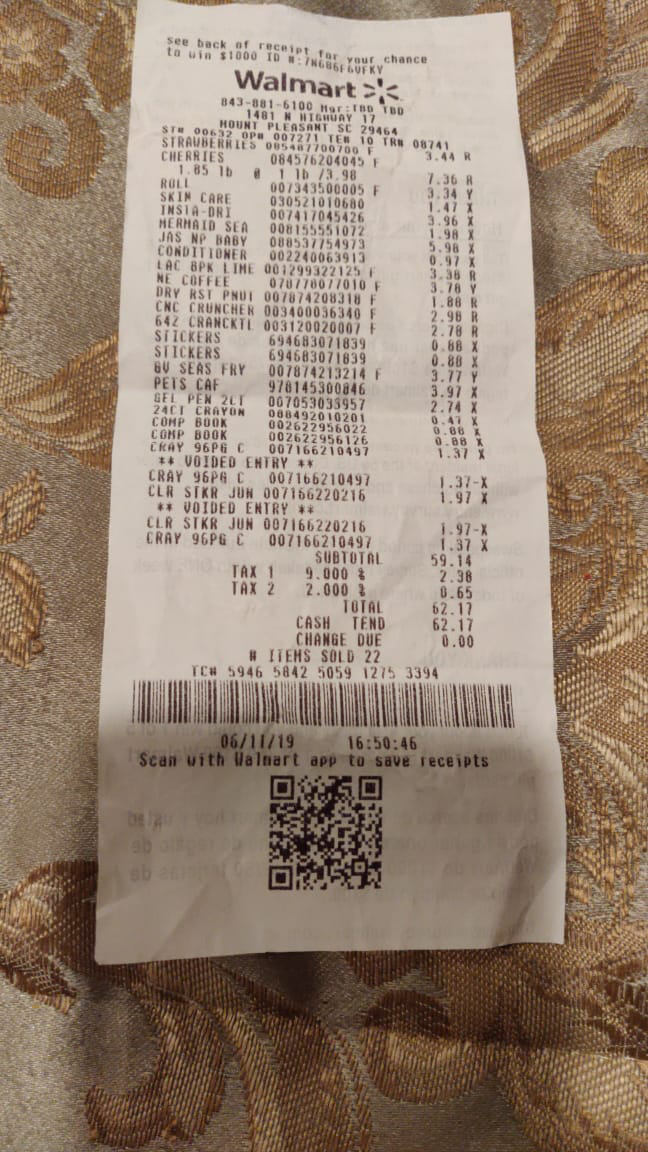

In [11]:
img1

In [8]:
new_image = img1.resize((400, 400))
#new_image.save('image_400.jpg')

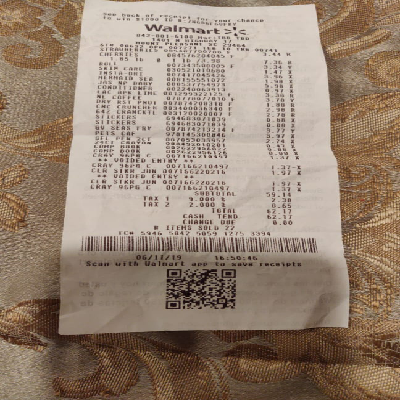

In [9]:
new_image

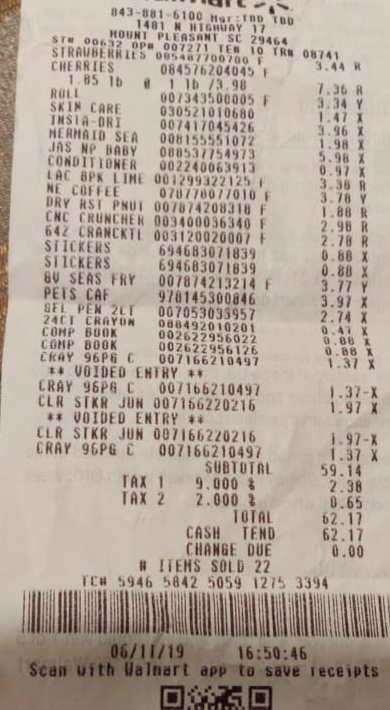

In [33]:
#image = Image.open('unsplash_01.jpg')
box = (110, 90, 500, 800)
cropped_image = img1.crop(box)
cropped_image#.save('cropped_image.jpg')

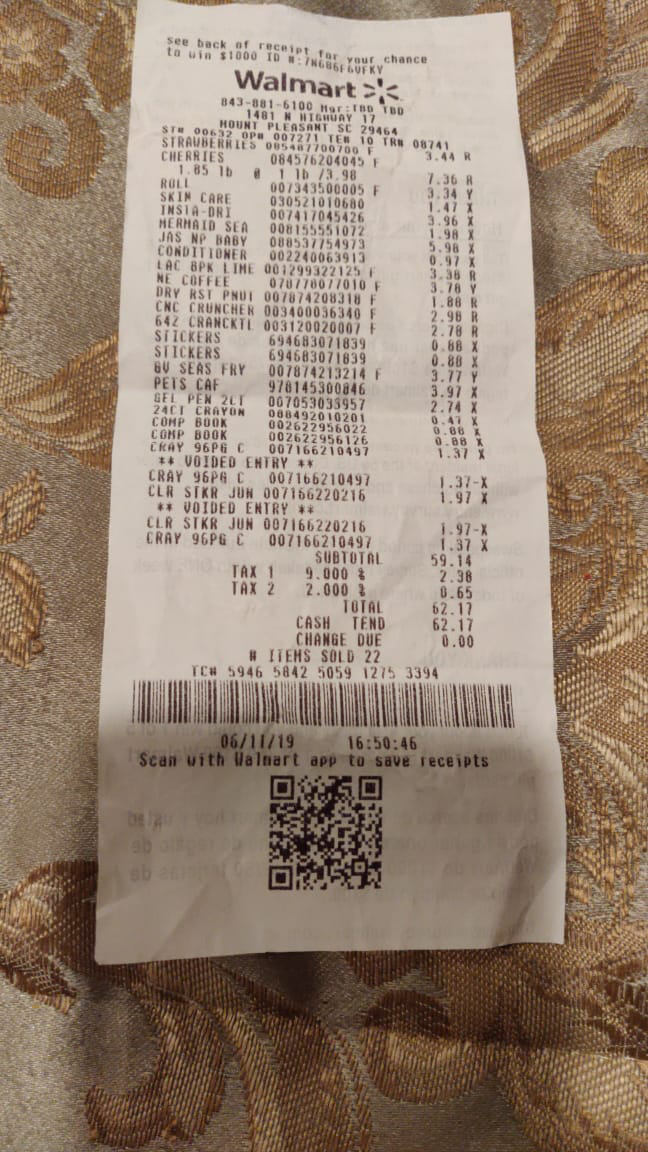

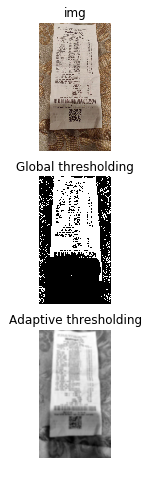

In [36]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local


img = cv2.imread('image1.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


global_thresh = threshold_otsu(img)
binary_global = img > global_thresh

block_size = 35
binary_adaptive = threshold_local(img, block_size, offset=10)

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('img')

ax1.imshow(binary_global)
ax1.set_title('Global thresholding')

ax2.imshow(binary_adaptive)
ax2.set_title('Adaptive thresholding')

for ax in axes:
    ax.axis('off')

plt.show()

In [49]:
import cv2
import numpy as np
#from shapeDetector import ShapeDetector
import imutils

img = cv2.imread('image1.jpeg')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 10)
dilate = cv2.dilate(erosion,kernel,iterations = 10)

image = dilate
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])

# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
invert=cv2.bitwise_not ( dilate, dilate )
cv2.imwrite("pic.jpeg",invert)


True

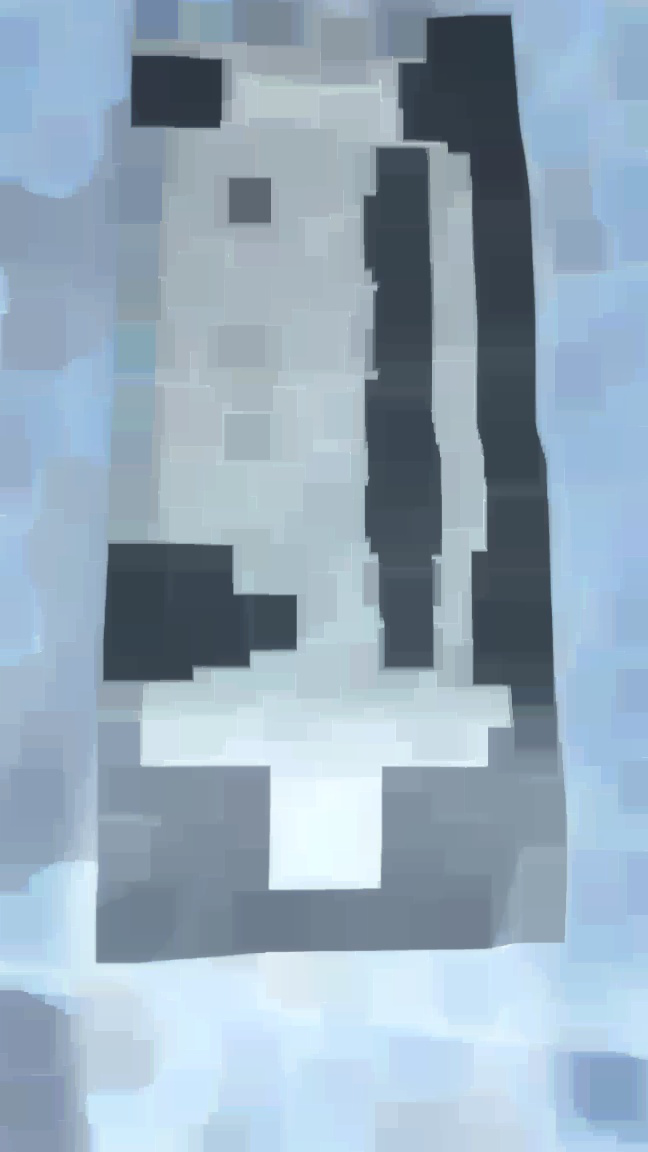

In [51]:
Image.open('pic.jpeg')

In [102]:
import cv2
import numpy as np

# Run the code with the image name, keep pressing space bar

# Change the kernel, iterations, Contour Area, position accordingly
# These values work for your present image

img = cv2.imread("image1.jpeg", 0);
h, w = img.shape[:2]
kernel = np.ones((1000,1000),np.uint8)

e = cv2.erode(img,kernel,iterations = 10)  
d = cv2.dilate(e,kernel,iterations = 10)
ret, th = cv2.threshold(d, 150, 255, cv2.THRESH_BINARY_INV)

mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(th, mask, (600,600), 255)
out = cv2.bitwise_not(th)
out= cv2.dilate(out,kernel,iterations = 3)
cnt, h = cv2.findContours(out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#print(cnt)
for i in range(len(cnt)):
            area = cv2.contourArea(cnt[i])
            if(area>10000 and area<100000):
                mask = np.zeros_like(img)
                draw=cv2.drawContours(mask, cnt, i, 255, -1)
                x,y,w,h = cv2.boundingRect(cnt[i])
                crop=img[y:h+y,x:w+x]
                #print(":inside")

cv2.imwrite('po.jpeg',crop)

                  



True

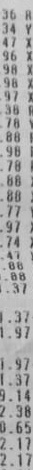

In [103]:
Image.open('po.jpeg')

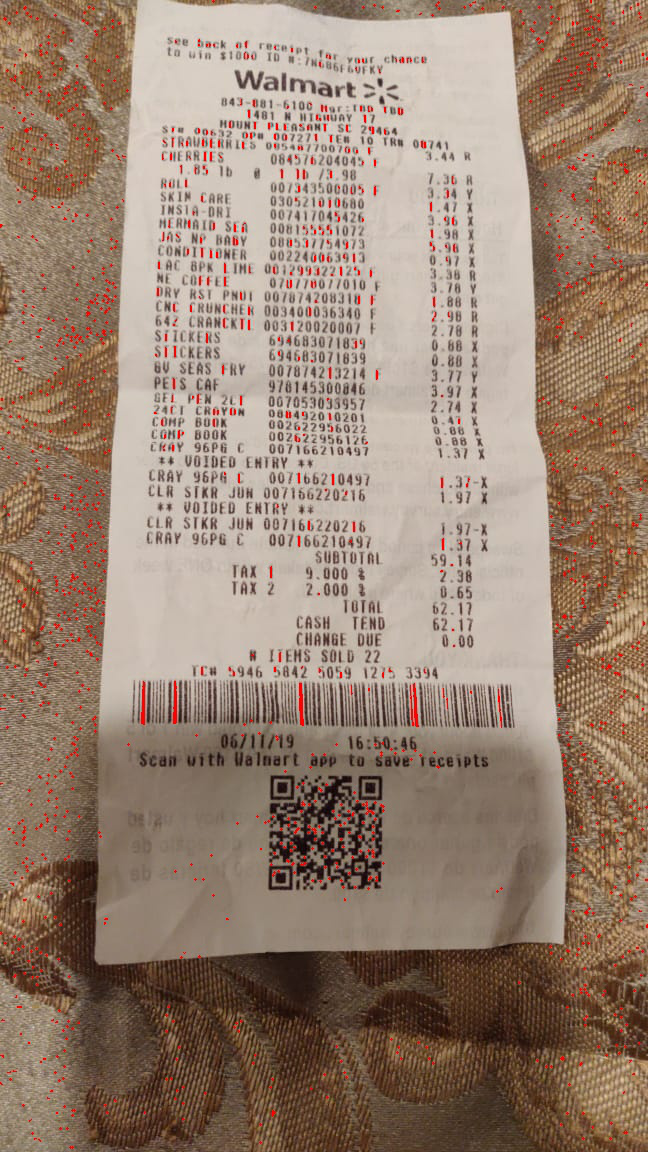

In [107]:
Image.open('lol.jpeg')

In [2]:
import cv2
import numpy as np
from PIL import Image

In [3]:
img = cv2.imread("image1.jpeg")
 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:

 _, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [10]:
img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
#cv2.imwrite("contour.jpeg",img_contours)

In [6]:
img_contours = sorted(img_contours, key=cv2.contourArea)
 
for i in img_contours:
 
    if cv2.contourArea(i) > 100:
 
        break

In [7]:
mask = np.zeros(img.shape[:2], np.uint8)
new_img = cv2.bitwise_and(img, img, mask=mask)
cv2.imwrite('new_img.jpeg',new_img)

True

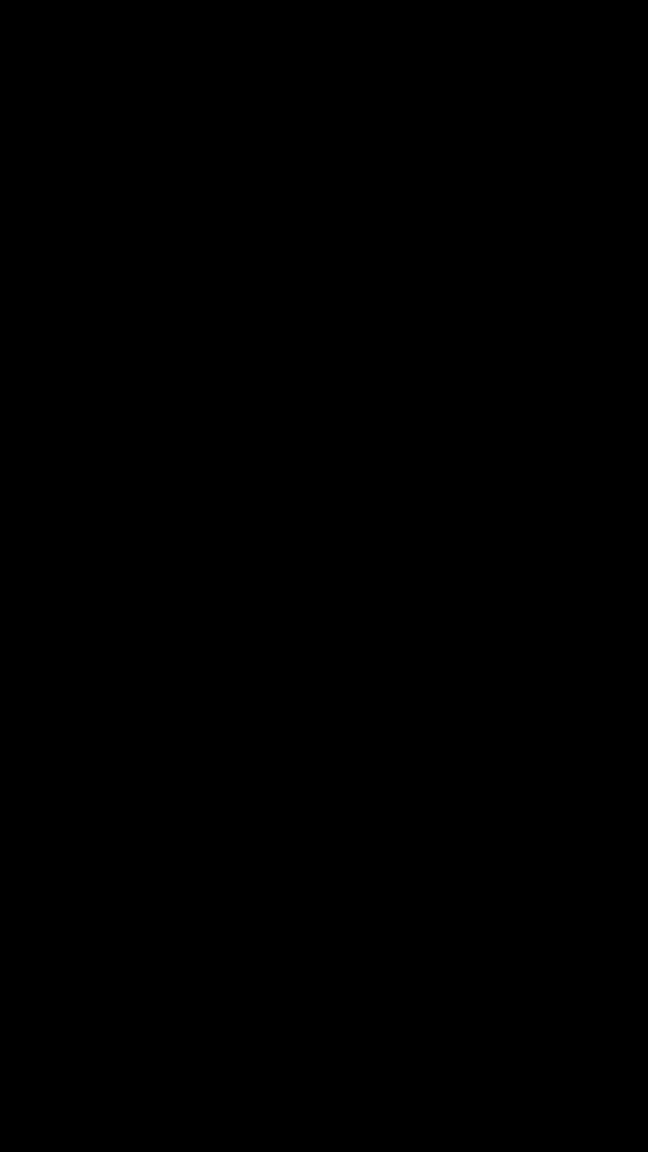

In [8]:
Image.open('new_img.jpeg')